## Ridge Regression ($L_2$ regression) 

The Gradient Descent uses cost function: 
$$
MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$
And tries to minimize it, finding the best theta.

But this only tries to reduce the error and hence if can fit the noise too and overfit the data.  
To reduce it we modify the cost function as:
$$
J{(\theta)} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \alpha \sum_{i=1}^{n} (\theta_i)^2
$$

Now the Gradient Descent tries to minimize this function to get best theta

The term $\alpha \sum_{i=1}^{n} (\theta_i)^2$ is called _Penalty_ and $\alpha$ is _regularization strength_  
It decreases the weights "$\theta_i$" so that algorithm fits the data but also keep weights as small as possible to not overfit the data

Closed form of Ridge Regression
$$
\hat{\boldsymbol{\theta}} = \left( \mathbf{X}^\top \mathbf{X} + \alpha \mathbf{A} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$


### Relation: $\alpha$↑ --> weights↓

In [66]:
import numpy as np
m=100
X = 6*np.random.rand(m,1) - 3
y = 10 + 0.5*X + X**2 + 5*np.random.rand(m,1)  

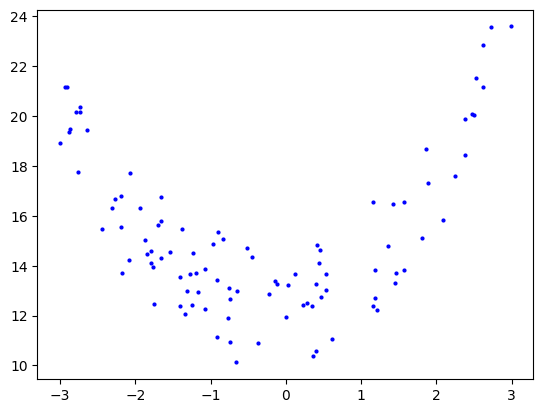

In [67]:
import matplotlib.pyplot as plt

plt.scatter(X,y,s=4,c="b")

In [68]:
print(y.shape)
y = y.ravel()     #To change the shape from (100,1) to (100,), cuz model need 1d array
print(y.shape)

(100, 1)
(100,)


In [86]:
## Method 1 for ridge regression
from sklearn.preprocessing import StandardScaler    #Ridge is sensitive to scale
from sklearn.linear_model import SGDRegressor    
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=20,include_bias=False)   #Since Ridge regression prevents 'overfitting', we are testing THAT
X_poly = poly_features.fit_transform(X)
sgd_regressor = SGDRegressor(loss = 'squared_error',
    penalty='l2',           # l2 = ridge regression
    alpha=0.1,              # regularization strength
    max_iter=1000,
    eta0=0.01,
    tol=0.0001)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

sgd_regressor.fit(X_scaled,y)

SGDRegressor(alpha=0.1, tol=0.0001)

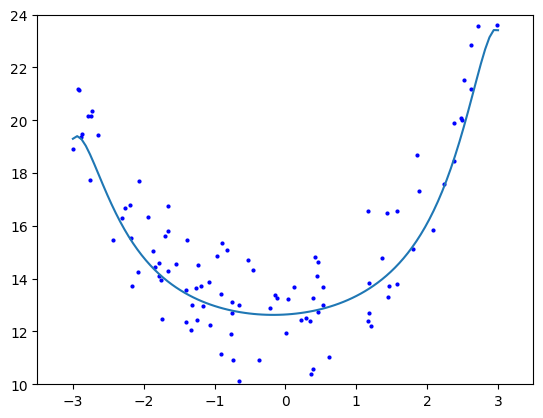

In [90]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
X_new_scaled = scaler.fit_transform(X_new_poly)
y_predict = sgd_regressor.predict(X_new_scaled)

plt.axis([-3.5,3.5,10,24])
plt.scatter(X,y,c="b",s=4)
plt.plot(X_new,y_predict)

Even though its overfitted (degree=10) the regularization is not letting it overfit

In [88]:
# Method 2 : directly use Ridge regression
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha=0.1,solver='cholesky')  #There are different solvers for different scenarios

X_poly = poly_features.fit_transform(X)
X_scaled = scaler.fit_transform(X_poly)
ridge_regressor.fit(X_scaled,y)

Ridge(alpha=0.1, solver='cholesky')

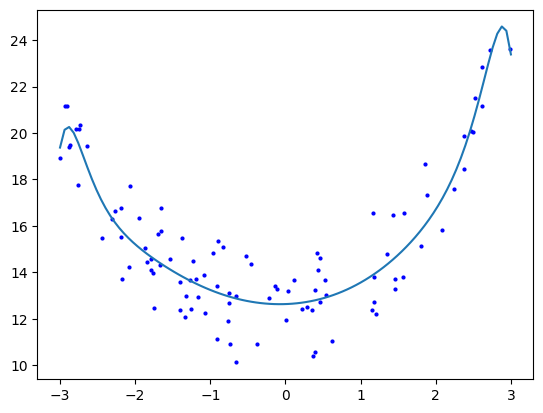

In [89]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
X_new_scaled = scaler.transform(X_new_poly)
y_predict = ridge_regressor.predict(X_new_scaled)

# plt.axis([-3,3,10,24])
plt.scatter(X,y,c="b",s=4)
plt.plot(X_new,y_predict)

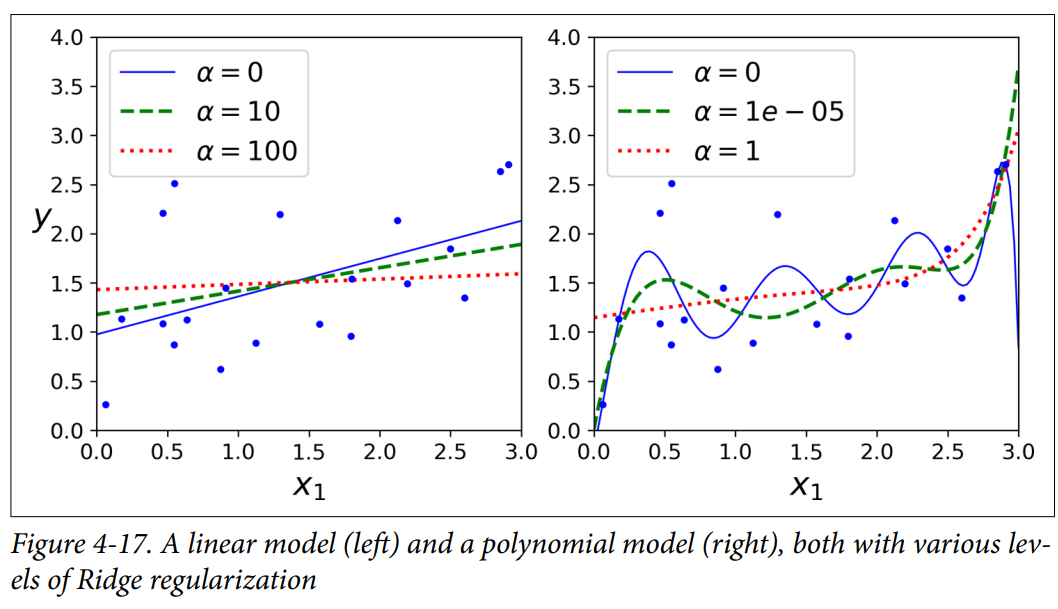

## _Lasso Regression ($l_1 regression$)_
Least Absolute Shrinkage and Selection Operator Regression - LASSO regression  
is another regularized version of linear regression  
It uses $l_1$ norm of weights  


Lasso regression tries to minimize the cost function:  
$$
J{(\theta)} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \alpha \sum_{i=1}^{n} |\theta_i|
$$

In [93]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_scaled,y)

Lasso(alpha=0.1)

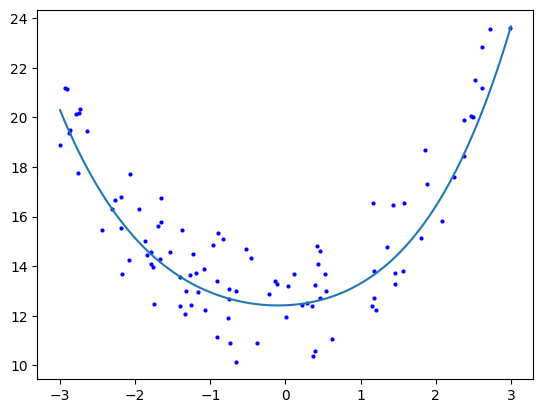

In [95]:
y_predict = lasso_regressor.predict(X_new_scaled)

# plt.axis([-3,3,10,24])
plt.scatter(X,y,c="b",s=4)
plt.plot(X_new,y_predict)

Why does it seem perfect 2 degree polynomial?  
- Because even though we gave 20 polynomial features, lasso tends to eliminate less important features by itself!! and thats why it almost removed all the extra features

In [ ]:
lasso_regressor.coef_

array([ 0.22836007,  1.80278803,  0.50476772,  1.00695009,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ])

see! only 4 weights are non zero

- Feature selection characteristic of lasso:   
Lasso Regression is that it tends to eliminate the
weights of the least important features (i.e., set them to zero)

We can also use SGDregressor with 'penalty' = $l_1$

## _Elastic Net_
Middle ground of Ridge and Lasso, the mix ratio 'r' is used  
r=1 --> Lasso regression  
r=0 --> Ridge regression  

Cost function used:
$$
J{(\theta)} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} (\theta_i)^2
$$

In [98]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)   #l1_ratio is mix ratio
elastic_net.fit(X_scaled,y)

ElasticNet(alpha=0.1)

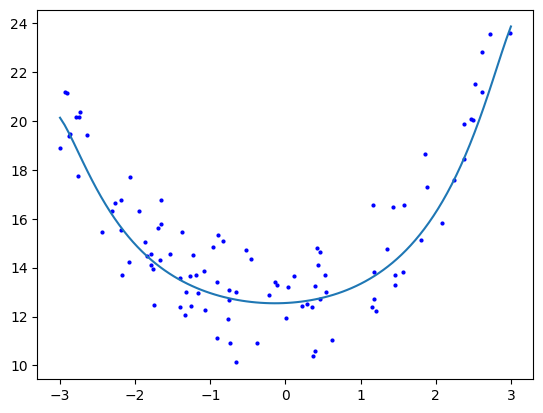

In [99]:
y_predict = elastic_net.predict(X_new_scaled)

# plt.axis([-3,3,10,24])
plt.scatter(X,y,c="b",s=4)
plt.plot(X_new,y_predict)

In [100]:
elastic_net.coef_

array([ 0.26456316,  1.50406843,  0.39426068,  0.98147168,  0.12721822,
        0.45691754,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.15121891])

In [101]:
lasso_regressor.coef_

array([ 0.22836007,  1.80278803,  0.50476772,  1.00695009,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ])

In [102]:
ridge_regressor.coef_

array([ 0.18387225,  1.98315506,  0.42273532,  0.48751403,  0.27613404,
       -0.49711797,  0.20507969,  0.13673423,  0.12613107,  0.89871612,
        0.02205995,  1.16755586, -0.07574495,  0.89260402, -0.13067793,
        0.21454324, -0.11894531, -0.70840933, -0.03033545, -1.75463688])

See the coeffients of each model, lasso removes some feature by equating weights equal to zero, ridge tries to decrease weights a bit to fix overfitting while elastic net is somewhere in middle

## Finally 

- ✅ **Prefer regularized models** over plain Linear Regression (without regularization).

- ⚙️ **Ridge Regression** is a good default choice.

- 🎯 Use **Lasso** or **Elastic Net** if you believe only a few features are important:
  - They can shrink useless feature weights to zero (feature selection).

- 👍 **Elastic Net** is generally preferred over Lasso because:
  - Lasso can behave unstably when:
    - The number of features > number of training samples.
    - Features are strongly correlated.

- 🧮 In **Elastic Net**, the `l1_ratio` controls the balance between Lasso and Ridge effects:
  - `l1_ratio = 1` → Lasso regression.
  - `l1_ratio = 0` → Ridge regression.